<a href="https://colab.research.google.com/github/daghsen/gomycode/blob/main/checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
data_to_load = files.upload()

Saving titanic-passengers.csv to titanic-passengers (1).csv


In [31]:
df=pd.read_csv('titanic-passengers.csv',sep=';')

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [37]:
print(df["Cabin"].value_counts())

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
B30            1
D50            1
C95            1
B4             1
E36            1
Name: Cabin, Length: 147, dtype: int64


In [38]:
df['Cabin'].fillna('G6',inplace=True)

In [39]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [40]:
df['Embarked'].fillna('S',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


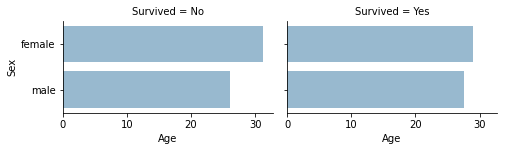

In [45]:
import seaborn as sns
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", 'Sex', alpha=.5, ci=None)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


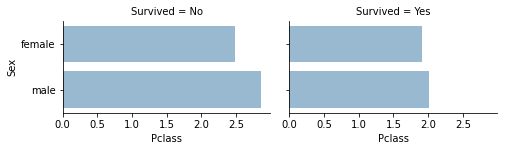

In [46]:
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Pclass", 'Sex', alpha=.5, ci=None)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


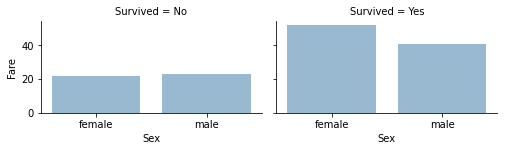

In [48]:
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [52]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

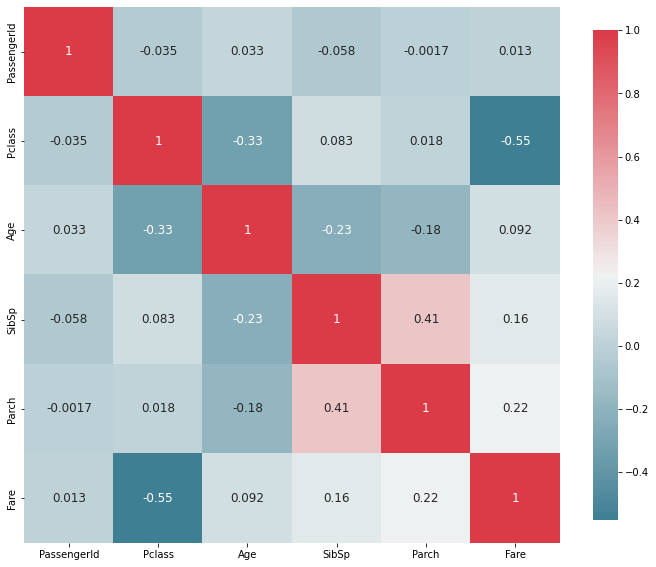

In [54]:
plot_correlation_map( df )

In [56]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [64]:
Title_Dictionary = { "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                    "Dr":         "Officer",

                    "Rev":       "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [67]:
# Dropping two columns 
df.drop('Ticket',axis='columns', inplace =True ) 
df.drop('Cabin',axis='columns', inplace =True ) 
# Adding new column 
Title =[]
for i in range (0,891) :
    ch=''
    x=df['Name'][i].index(',')
    y=df['Name'][i].index('.')
    for j in range (x+2,y) :
        ch=ch+df['Name'][i][j]
    Title.append(ch)
df['Title']=Title
df.drop('Name',axis='columns', inplace =True) 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,343,0,2,male,28.000000,0,0,13.0000,S,Mr
1,76,0,3,male,25.000000,0,0,7.6500,S,Mr
2,641,0,3,male,20.000000,0,0,7.8542,S,Mr
3,568,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,672,0,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,61,0,3,male,22.000000,0,0,7.2292,C,Mr
888,535,0,3,female,30.000000,0,0,8.6625,S,Miss
889,102,0,3,male,29.699118,0,0,7.8958,S,Mr


In [68]:
Title=[]
for i in range (0,891) :
    ch=Title_Dictionary[df['Title'][i]]
    TitleFam.append(ch)
df['TitleFam']=TitleFam
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleFam
0,343,0,2,male,28.000000,0,0,13.0000,S,Mr,Mrs
1,76,0,3,male,25.000000,0,0,7.6500,S,Mr,Mrs
2,641,0,3,male,20.000000,0,0,7.8542,S,Mr,Mrs
3,568,0,3,female,29.000000,0,4,21.0750,S,Mrs,Mrs
4,672,0,1,male,31.000000,1,0,52.0000,S,Mr,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,30.0708,C,Mrs,Mrs
887,61,0,3,male,22.000000,0,0,7.2292,C,Mr,Mrs
888,535,0,3,female,30.000000,0,0,8.6625,S,Miss,Miss
889,102,0,3,male,29.699118,0,0,7.8958,S,Mr,Mrs
